In [803]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [804]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [805]:
df1.shape

(13320, 9)

In [806]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [807]:
df2 = df1.drop(['availability', 'area_type', 'society', 'balcony'], axis='columns')

In [808]:
df2.shape


(13320, 5)

# Data Cleaning

In [809]:
#tells number of rows where particular coloumn value is NA
df2.isnull().sum()
df2.shape

(13320, 5)

In [810]:
df3 = df2.dropna() #dropping the NA values 
df3.isnull().sum() #checking all NA values again

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [811]:
df3.shape

(13246, 5)

In [812]:
df3['size'].unique() #to check all the unique values in the "size" column 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [813]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) 
#creating a new coloumn based on the size coloumn, applying lambda function to get the values of coloumn and split to get the numbers from bhk or bedrooms, using int to convert string to integer

<ipython-input-813-ff70a21e3be2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [814]:
df3.head() #cheaking the dataframe again

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [815]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [816]:
df3[df3.bhk>20] #checking the coloums where BHK value is greater than 20 

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [817]:
df3['total_sqft'].unique() #there are range and variours type of values are available in this row

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [818]:
#checking the variations, detecting if the given value in the total_sqft coloumn is a float or not 
def is_float(x):
    try: 
        float(x)#trying to convert values in total_sqft column in float 
    except: #if it is not a valid value(not a float) it will come into this except block
        return False
    return True     

In [819]:
#taking total_sqft coloumn and applying the is_float function 
df3[df3['total_sqft'].apply(is_float)] #it willreturn just the value which are true 

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [820]:
df3[~df3['total_sqft'].apply(is_float)].head(10) #to check the colums where it is not a valid float number using NEGATE OPERATION 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [821]:
#converting range values into a float by taking average and ignoring the values which are in meter or perch 
def converting_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [822]:
converting_sqft_to_num('2134')

2134.0

In [823]:
converting_sqft_to_num('1195 - 1440')

1317.5

In [824]:
converting_sqft_to_num('34.46Sq. Meter') #wont return anything 

In [825]:
df4 = df3.copy() #creating a new dataframe which is copy of df2 
df4['total_sqft'] = df3['total_sqft'].apply(converting_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]

In [826]:
df4.head(2) #all the data in total_sqt is converted into a float 

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [827]:
df4.shape

(13200, 6)

In [828]:
df4.loc[661] #to access a particular index

location      Yelahanka
size              2 BHK
total_sqft       1132.5
bath                2.0
price             48.13
bhk                   2
Name: 661, dtype: object

# Feature Engineering and Dimensionality Reduction Technique

In [829]:
df5 = df4.copy()

In [830]:
df5['price_per_sqft'] = df5['price']*100000/ df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [831]:
df5.shape

(13200, 7)

In [832]:
len(df5['location'].unique()) 

1298

In [833]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [834]:
len(location_stats[location_stats<=10])

1047

In [835]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [836]:
len(df5.location.unique())

1287

In [837]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
len(df5.location.unique())

241

In [838]:
df5.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal 
outlier detection and removal
outlier are data points which are data error, represent the extreme variation in dataset although they are valid makes sense to remove them to avoid errors occuring in future 

In [839]:
#either we will use standard deviation or simple domain knowledge 
#first we will know what is typical size of per bedroom is in sqft, using this criteria we will create a threshold we will examine our data and see where our property is not met

In [840]:
df5[df5.total_sqft/df4.bhk<300].head() #data errors for us , we will remove these

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [841]:
df5.shape

(13200, 7)

In [842]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)] #negate it to filter all those rows , to remove the outliers
df6.shape

(12456, 7)

In [843]:
df6.price_per_sqft.describe() #to get basic statistics of that particular coloumn

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [844]:
df6.shape

(12456, 7)

In [845]:
#to create a generic model we will remove the values where price_per_sqft is either too low or too high
#removing the extreme cases based on standard deviation 
#assuming our dataset is normally distributed, if so our most of the data points should lie somewhere near mean and 1 SD
#filter everything beyond 1 SD

In [846]:
def remove_outliers(df): #taking dataframe as an input 
    df_out = pd.DataFrame() 
    for key, subdf in df.groupby('location'): #grouping them by location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))] #keeping anything with in the threshold
        df_out = pd.concat([df_out,reduce_df], ignore_index=True)
    return df_out
df7 = remove_outliers(df6)
df7.shape

(10242, 7)

In [847]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


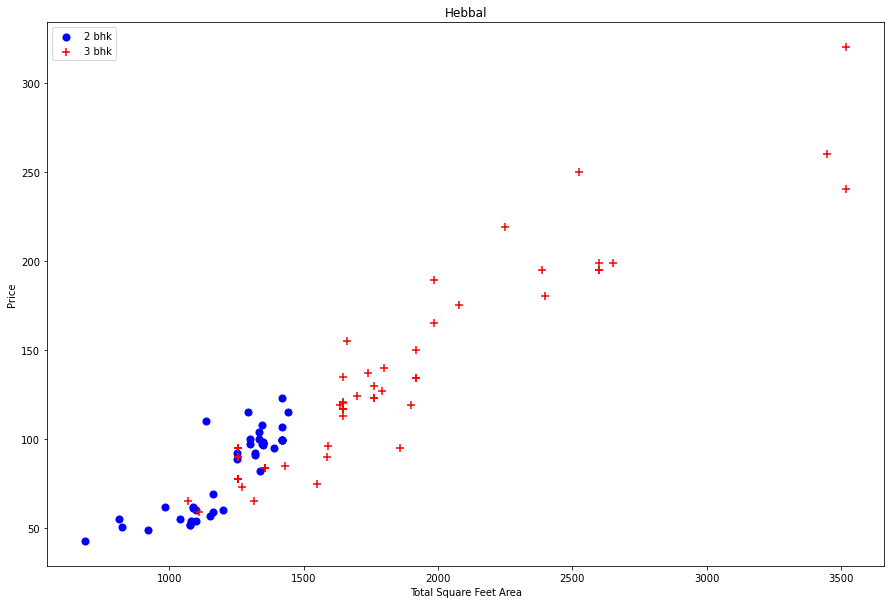

In [848]:
#we will check whether the property prices of 3 bhk is greater then 2bhk or not 
#drawing a plot where we will have data points for 2 bhk and 3 bhk  
def scatter_plot_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color ='blue', label='2 bhk', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color ='red', label='3 bhk', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
scatter_plot_chart(df7, "Hebbal")

In [849]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [850]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): #going through every location dataframe
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            #for every location dataframe we are again creating a new dataframe based on bhk
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft), 
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            } #per bhk dataframe i am computing mean, standard deviation and count 
        for bhk, bhk_df in location_df.groupby('bhk'): #running the same for loop again 
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                #excluding the data points where the value of price_per_sqft exceding the price_per_sqft of bhk greater then previous
    return df.drop(exclude_indices,axis='index')
    
df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 7)

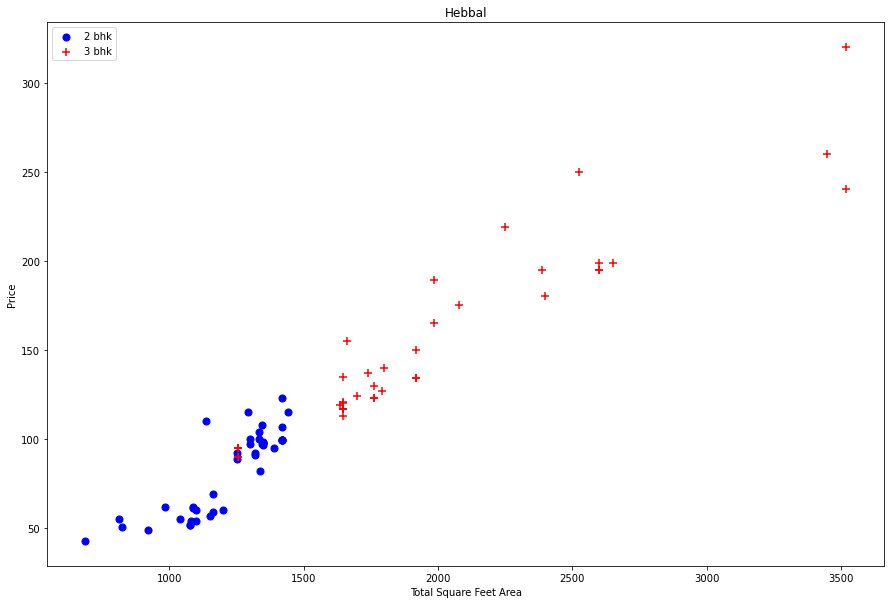

In [851]:
scatter_plot_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

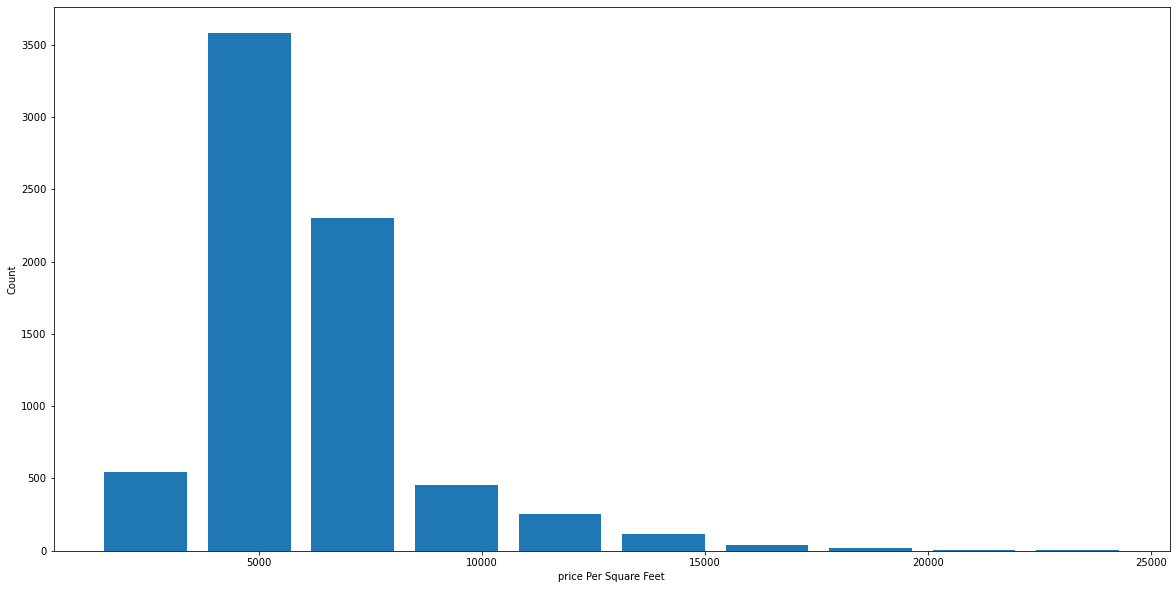

In [852]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("price Per Square Feet")
plt.ylabel("Count")

In [853]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [854]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

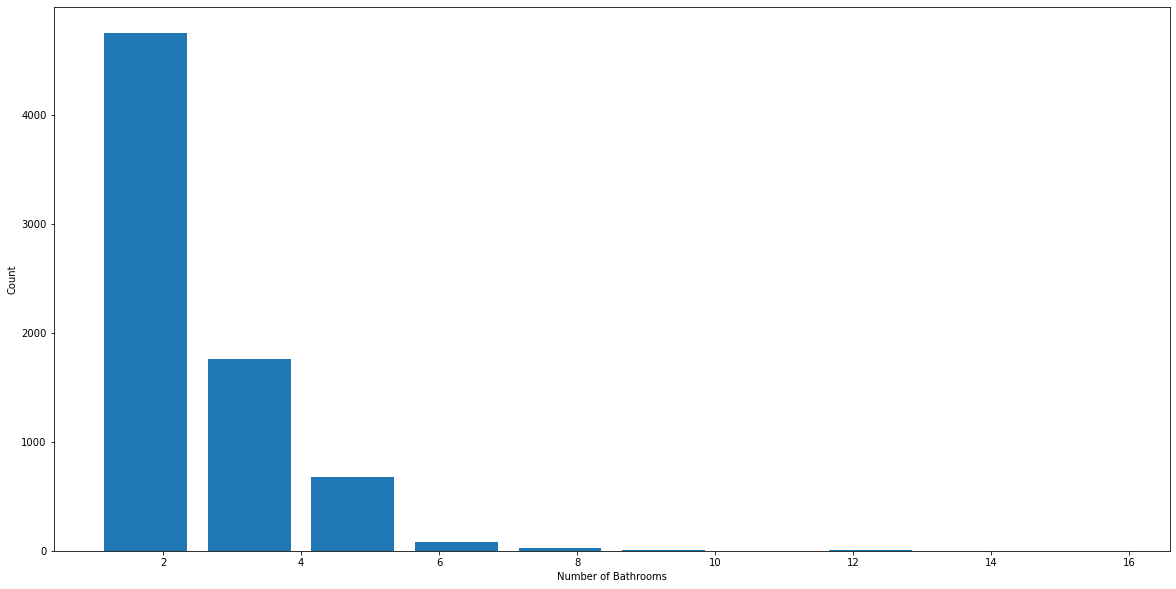

In [855]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [860]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [863]:
df8.shape

(7317, 7)

In [864]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [865]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [ ]:
#ML model cannot interpret text data so we will convert the text data into numeric data. using hot encoding dummies. 

# Machine Learning Model Building

In [867]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [871]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')], axis = 'columns') #to avoid a dummy variable trap we need to have one less dummy variable
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [873]:
#dropping the location column because we have it already in dummies coloumn
df12 = df11.drop('location', axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [874]:
df12.shape

(7239, 244)

In [875]:
#dropping the dependent variables
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [876]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [877]:
#we always divide our dataset into training and test dataset
#use training data set for the model training and test data set for evaluating the model performance

In [880]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
#testsize is % of sample to be test sample, remaining for model training

In [882]:
from sklearn.linear_model import LinearRegression 
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train) #train the model
lr_clf.score(X_test,y_test) #evaluate the score of the model, how good our model is

0.8629132245229447

In [884]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0) #shufflesplit will randomize the sample so tht each of the fold have equal distribution of data sample, not targetted in one area

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [ ]:
#other regression techniques
#tofigure out which one gives best score
#gridsearchcv is an api which helps to run the model on diffrent regressors and parameters can tell us the best score 

In [885]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor

In [891]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha' : [1,2],
                'selection': ['random','cyclic']
            }
        },  
        'decison_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    score = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        score.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(score,columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726774,"{'alpha': 2, 'selection': 'random'}"
2,decison_tree,0.718383,"{'criterion': 'mse', 'splitter': 'best'}"


In [895]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath 
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] =1
        
    return lr_clf.predict([x])[0]

In [897]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.865702583115

In [898]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

86.08062284986275

In [899]:
#export this model to pickel file it will be used by python flask server

In [901]:
import pickle
with open('banglore_house_price_prediction.pickle','wb') as f:
    pickle.dump(lr_clf,f) 

In [ ]:
import json
columns = {
    'data_columns'
}